<a href="https://colab.research.google.com/github/Malachirag/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Displaying first 5 images from 'benign' folder:


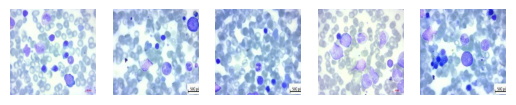

Displaying first 5 images from 'pro' folder:


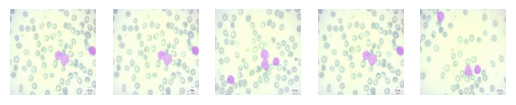

In [ ]:
#code for displaying 5 images from both datasets
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_images(folder_path, num_images=5):
    # Get the list of files in the folder
    files = os.listdir(folder_path)

    # Display the first num_images images
    for i in range(min(num_images, len(files))):
        image_path = os.path.join(folder_path, files[i])
        image = Image.open(image_path)

        # Display the image
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')

    plt.show()

# Specify the paths to your folders
main_folder = "/content/drive/MyDrive/Final Project/Dataset"
benign_folder = os.path.join(main_folder, "Benign")
pro_folder = os.path.join(main_folder, "Pro")

# Display first 5 images from the 'benign' folder
print("Displaying first 5 images from 'benign' folder:")
display_images(benign_folder)

# Display first 5 images from the 'pro' folder
print("Displaying first 5 images from 'pro' folder:")
display_images(pro_folder)


In [ ]:
#code for checking count of images in separate benign and pro images
def count_images_in_directory(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Specify the paths to your train and test directories
benign_dir = "/content/drive/MyDrive/Final Project/Dataset/Benign"
pro_dir = "/content/drive/MyDrive/Final Project/Dataset/Pro"

# Count the number of images in the train and test directories
num_train_images = count_images_in_directory(benign_dir)
num_test_images = count_images_in_directory(pro_dir)

# Print the results
print(f"Number of images in the Benign dataset: {num_train_images}")
print(f"Number of images in the Pro dataset: {num_test_images}")


Number of images in the Benign dataset: 504
Number of images in the Pro dataset: 804


In [ ]:
#split data into train and test
import os
import shutil
from sklearn.model_selection import train_test_split

# Define your main dataset directory
main_dataset_dir = "/content/drive/MyDrive/Final Project/Dataset"

# Define the directories for benign and pro images
benign_dir = os.path.join(main_dataset_dir, "Benign")
pro_dir = os.path.join(main_dataset_dir, "Pro")

# Define the directories for training and test sets
train_dir = "/content/drive/MyDrive/Final Project/Train"
test_dir = "/content/drive/MyDrive/Final Project/Test"

# Create the training and test directories
os.makedirs(os.path.join(train_dir, "Benign"), exist_ok=True)
os.makedirs(os.path.join(train_dir, "Pro"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Benign"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Pro"), exist_ok=True)

# Function to split the dataset into training and test sets
def split_dataset(src_dir, train_dst, test_dst, test_size=0.2, random_state=42):
    # Get the list of all image files in the source directory
    all_images = [f for f in os.listdir(src_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Split the images into training and test sets
    train_images, test_images = train_test_split(all_images, test_size=test_size, random_state=random_state)

    # Copy images to the training set
    for img in train_images:
        src_path = os.path.join(src_dir, img)
        dst_path = os.path.join(train_dst, img)
        shutil.copy(src_path, dst_path)

    # Copy images to the test set
    for img in test_images:
        src_path = os.path.join(src_dir, img)
        dst_path = os.path.join(test_dst, img)
        shutil.copy(src_path, dst_path)

# Split the dataset for benign images
split_dataset(benign_dir, os.path.join(train_dir, "Benign"), os.path.join(test_dir, "Benign"))

# Split the dataset for pro images
split_dataset(pro_dir, os.path.join(train_dir, "Pro"), os.path.join(test_dir, "Pro"))


In [ ]:
#count of images in training
def count_images_in_directory(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Specify the paths to your train and test directories
benign_dir = "/content/drive/MyDrive/Final Project/Train/Benign"
pro_dir = "/content/drive/MyDrive/Final Project/Train/Pro"

# Count the number of images in the train and test directories
num_train_images = count_images_in_directory(benign_dir)
num_test_images = count_images_in_directory(pro_dir)

# Print the results
print(f"Number of images in the Benign dataset: {num_train_images}")
print(f"Number of images in the Pro dataset: {num_test_images}")


Number of images in the Benign dataset: 403
Number of images in the Pro dataset: 643


In [ ]:
#count of images in test
def count_images_in_directory(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Specify the paths to your train and test directories
benign_dir = "/content/drive/MyDrive/Final Project/Test/Benign"
pro_dir = "/content/drive/MyDrive/Final Project/Test/Pro"

# Count the number of images in the train and test directories
num_train_images = count_images_in_directory(benign_dir)
num_test_images = count_images_in_directory(pro_dir)

# Print the results
print(f"Number of images in the Benign dataset: {num_train_images}")
print(f"Number of images in the Pro dataset: {num_test_images}")


Number of images in the Benign dataset: 101
Number of images in the Pro dataset: 161


In [ ]:
#code of data augmentation
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os

# Define the path to your original training dataset
original_train_dir = "/content/drive/MyDrive/Final Project/Train"

# Define the path to your augmented training dataset
augmented_train_dir = "/content/drive/MyDrive/Final Project/Augmentation"

# Create an ImageDataGenerator with augmentation parameters for the 'Benign' subfolder
datagen_benign = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

# Create an ImageDataGenerator with augmentation parameters for the 'Pro' subfolder
datagen_pro = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

# Iterate through each class (subfolder) in the original training dataset
for class_name in os.listdir(original_train_dir):
    class_path = os.path.join(original_train_dir, class_name)

    # Create separate folder for augmented images in each class
    augmented_class_path = os.path.join(augmented_train_dir, class_name)
    os.makedirs(augmented_class_path, exist_ok=True)

    # Set the appropriate datagen for each class
    if class_name == 'Benign':
        current_datagen = datagen_benign
        augment_count = 8
    elif class_name == 'Pro':
        current_datagen = datagen_pro
        augment_count = 5

    # Iterate through images in the original class folder
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images and save to the new folder
        i = 0
        for batch in current_datagen.flow(x, batch_size=1, save_to_dir=augmented_class_path, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= augment_count:
                break  # This ensures that we generate the specified number of augmented images for each original image


In [ ]:
#count of images in augmentation
import os
def count_images_in_directory(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Specify the paths to your train and test directories
benign_dir = "/content/drive/MyDrive/Augmentation/Benign"
pro_dir = "/content/drive/MyDrive/Augmentation/Pro"

# Count the number of images in the train and test directories
num_train_images = count_images_in_directory(benign_dir)
num_test_images = count_images_in_directory(pro_dir)

# Print the results
print(f"Number of images in the Benign dataset: {num_train_images}")
print(f"Number of images in the Pro dataset: {num_test_images}")


Number of images in the Benign dataset: 1515
Number of images in the Pro dataset: 1450


In [ ]:
#inception
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define paths to your training and test directories
train_dir = "/content/drive/MyDrive/Augmentation"
test_dir = "/content/drive/MyDrive/Test"

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create data generators with augmentation for training and validation data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Create image generators for training and test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=False  # No shuffling for test set
)

# Load InceptionV3 pre-trained on ImageNet without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model for binary classification
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.5)
    layers.Dense(1, activation='sigmoid')  # Binary classification, so 'sigmoid' activation
])

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Define callbacks
checkpoint = ModelCheckpoint("inceptionv3_best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_predictions = model.predict(test_generator)
test_pred_labels = (test_predictions > 0.5).astype(int)

# Get true labels for the test set
test_true_labels = test_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(test_true_labels, test_pred_labels))

# Print overall accuracy
accuracy = accuracy_score(test_true_labels, test_pred_labels)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Save the entire model (including the weights and optimizer state)
model.save("inceptionv3_model.h5")

Found 4262 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 22065185 (84.17 MB)
Trainable params: 22030753 (84.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________
Epoch 1/10
134/134 [==============================] - ETA: 0s - loss: 0.06

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


134/134 [==============================] - 118s 573ms/step - loss: 0.0641 - accuracy: 0.9786 - val_loss: 0.0803 - val_accuracy: 0.9811 - lr: 0.0010


KeyboardInterrupt: ignored

In [ ]:
#Xception
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define paths to your training and test directories
train_dir = "/content/drive/MyDrive/Augmentation"
test_dir = "/content/drive/MyDrive/Test"

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create data generators with augmentation for training and validation data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Create image generators for training and test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=False  # No shuffling for test set
)

# Load Xception pre-trained on ImageNet without the top (fully connected) layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model for binary classification
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so 'sigmoid' activation
])

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Define callbacks
checkpoint = ModelCheckpoint("xception_best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_predictions = model.predict(test_generator)
test_pred_labels = (test_predictions > 0.5).astype(int)

# Get true labels for the test set
test_true_labels = test_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(test_true_labels, test_pred_labels))

# Print overall accuracy
accuracy = accuracy_score(test_true_labels, test_pred_labels)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Save the entire model (including the weights and optimizer state)
model.save("xception_model.h5")

Found 4262 images belonging to 2 classes.
Found 265 images belonging to 2 classes.
83683744/83683744 [==============================] - 0s 0us/step


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_3  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21123881 (80.58 MB)
Trainable params: 262401 (1.00 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
Epoch 1/10
134/134 [==============================] - ETA: 0s - loss: 0.177

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


134/134 [==============================] - 78s 514ms/step - loss: 0.1777 - accuracy: 0.9320 - val_loss: 0.3675 - val_accuracy: 0.8264 - lr: 0.0010
Epoch 2/10
134/134 [==============================] - 65s 483ms/step - loss: 0.0535 - accuracy: 0.9824 - val_loss: 0.4511 - val_accuracy: 0.7811 - lr: 0.0010
Epoch 3/10
134/134 [==============================] - 67s 501ms/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 0.2358 - val_accuracy: 0.9057 - lr: 0.0010
Epoch 4/10
109/134 [=======================>......] - ETA: 11s - loss: 0.0452 - accuracy: 0.9864

KeyboardInterrupt: ignored

In [ ]:
#mobilenet
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, accuracy_score

# Define paths to your training and test directories
train_dir = "/content/drive/MyDrive/Augmentation"
test_dir = "/content/drive/MyDrive/Test"

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create data generators with augmentation for training and validation data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Create image generators for training and test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    shuffle=False  # No shuffling for test set
)

# Load MobileNetV2 pre-trained on ImageNet without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model for binary classification
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so 'sigmoid' activation
])

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Define callbacks
checkpoint = ModelCheckpoint("mobilenet_best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=5,  # Adjust as needed
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_predictions = model.predict(test_generator)
test_pred_labels = (test_predictions > 0.5).astype(int)

# Get true labels for the test set
test_true_labels = test_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(test_true_labels, test_pred_labels))

# Print overall accuracy
accuracy = accuracy_score(test_true_labels, test_pred_labels)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Save the entire model (including the weights and optimizer state)
model.save("mobilenet_model.h5")


Found 4262 images belonging to 2 classes.
Found 265 images belonging to 2 classes.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 128)               163968    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2422081 (9.24 MB)
Trainable params: 164097 (641.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/5
1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# Load InceptionV3, Xception, and MobileNetV2 models
inception_model = load_model("inception_model.h5")
xception_model = load_model("xception_model.h5")
mobilenet_model = load_model("mobilenet_model.h5")

# Define the paths to the input images
input_image_paths = [
    "/path/to/benign_image.jpg",
    "/path/to/malignant_image.jpg",
    # Add more paths as needed
]

# Load and preprocess input images for each model
inception_images = [tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224)) for img_path in input_image_paths]
inception_images = [tf.keras.preprocessing.image.img_to_array(img) / 255.0 for img in inception_images]
inception_images = np.array(inception_images)

xception_images = [tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224)) for img_path in input_image_paths]
xception_images = [tf.keras.preprocessing.image.img_to_array(img) / 255.0 for img in xception_images]
xception_images = np.array(xception_images)

mobilenet_images = [tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224)) for img_path in input_image_paths]
mobilenet_images = [tf.keras.preprocessing.image.img_to_array(img) / 255.0 for img in mobilenet_images]
mobilenet_images = np.array(mobilenet_images)

# Make predictions using each model
inception_preds = inception_model.predict(inception_images)
xception_preds = xception_model.predict(xception_images)
mobilenet_preds = mobilenet_model.predict(mobilenet_images)

# Rank-based ensemble technique
ensemble_preds = np.argsort(inception_preds + xception_preds + mobilenet_preds)

# Choose the majority vote as the final prediction
final_preds = np.sum(ensemble_preds, axis=1) >= 2

# Display the final predictions
for i, img_path in enumerate(input_image_paths):
    result = "Malignant" if final_preds[i] else "Benign"
    print(f"Image: {img_path} - Prediction: {result}")
